In [21]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from format_data import *

# Visualisations et analyse exploratoire des données  

### Importation et formattage des données

In [22]:
data = pd.read_csv("./data/final_train.csv")
data = format_data(data)
data.describe()

,LAT,LON,TMQ,U850,V850,UBOT,VBOT,QREFHT,PS,PSL,...,Z200,ZBOT,YEAR,MONTH,DAY,WIND850_MAGNITUDE,WINDBOT_MAGNITUDE,PRESSURE_DIFFERENCE,TEMP_DIFFERENCE,Label
count,18305.000000,18305.000000,18305.000000,18305.000000,18305.000000,18305.000000,18305.000000,18305.000000,18305.000000,18305.000000,...,18305.000000,18305.000000,18305.000000,18305.000000,18305.000000,18305.000000,18305.000000,18305.000000,18305.000000,18305.000000
mean,-1.430449,268.893660,35.002851,-0.885254,0.106123,-2.346637,-0.642704,0.014568,101544.779951,101547.267922,...,12295.433384,65.417270,2002.144332,7.485987,15.683693,6.768144,7.098754,-2.487970,-47.494665,0.302376
std,22.935610,39.800804,13.022441,6.768734,4.325975,5.980428,4.678453,0.004084,549.824426,548.769312,...,136.938855,1.075887,3.744231,2.439529,9.358180,4.417526,3.630217,18.114131,3.290848,0.695945
min,-31.095176,229.062500,6.960679,-58.805229,-26.216906,-58.260475,-20.760452,0.004364,96611.601560,96611.601560,...,11718.249020,62.433594,1996.000000,1.000000,1.000000,0.019476,0.089831,-189.742200,-53.837540,0.000000
25%,-24.524120,242.187500,24.028112,-5.513964,-2.239573,-6.585786,-3.463612,0.011341,101145.773400,101150.859400,...,12236.077150,64.677872,2000.000000,6.000000,7.000000,3.882268,4.509731,0.000000,-49.421722,0.000000
50%,12.790091,253.125000,35.027409,-2.038801,0.210423,-3.055683,-0.747902,0.014840,101497.890600,101501.593800,...,12336.177730,65.530731,2001.000000,8.000000,17.000000,5.938855,6.673823,0.000000,-48.475357,0.000000
75%,21.942634,277.187500,45.371262,2.827627,2.430779,1.263125,1.967306,0.018348,101888.867200,101889.945300,...,12398.419920,66.395180,2005.000000,9.000000,24.000000,8.464023,9.193710,0.000000,-46.759323,0.000000
max,24.054759,354.375000,80.641357,32.277344,58.060246,27.409748,31.106283,0.022328,103996.953100,103996.953100,...,12495.289060,67.131653,2009.000000,12.000000,31.000000,71.858836,62.309133,0.000000,-27.230606,2.000000


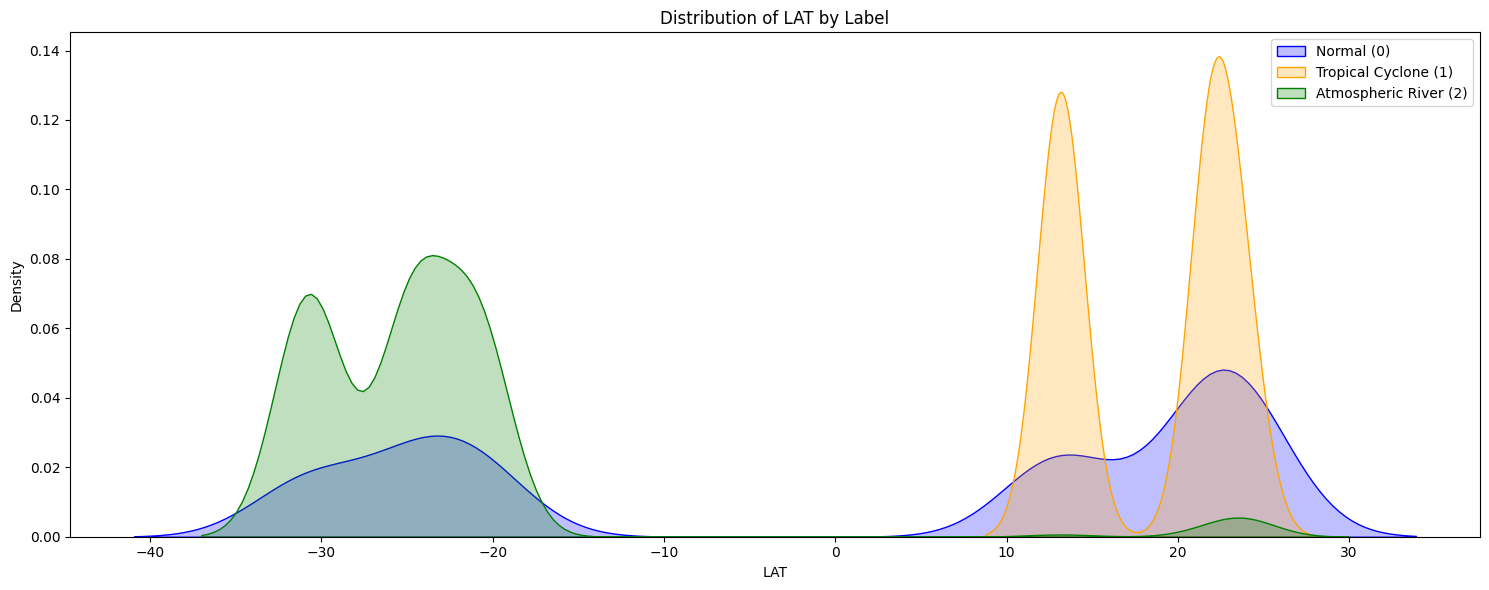

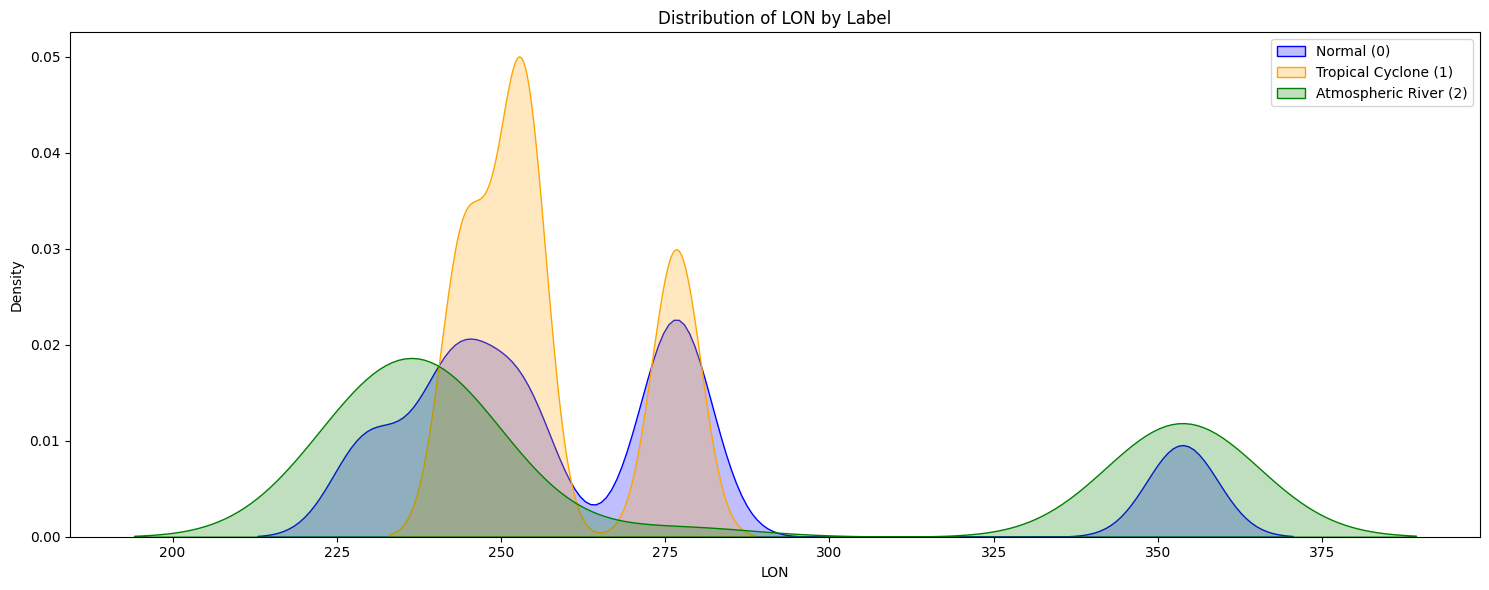

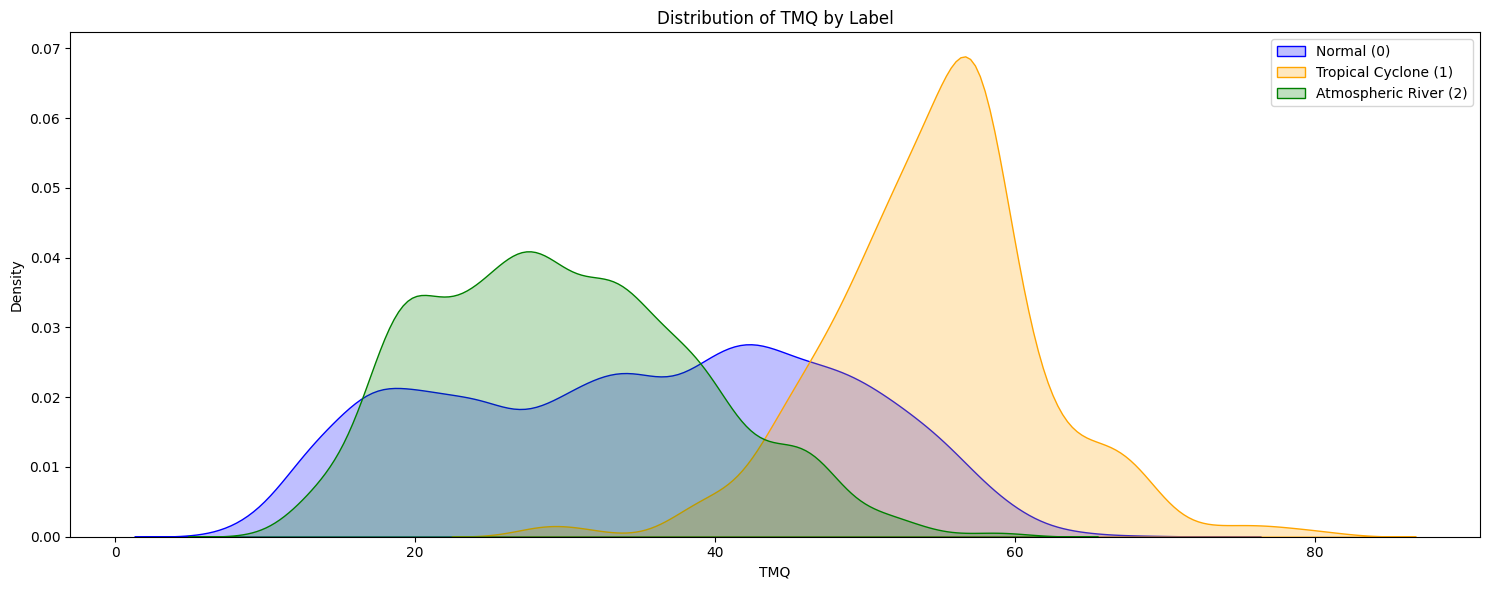

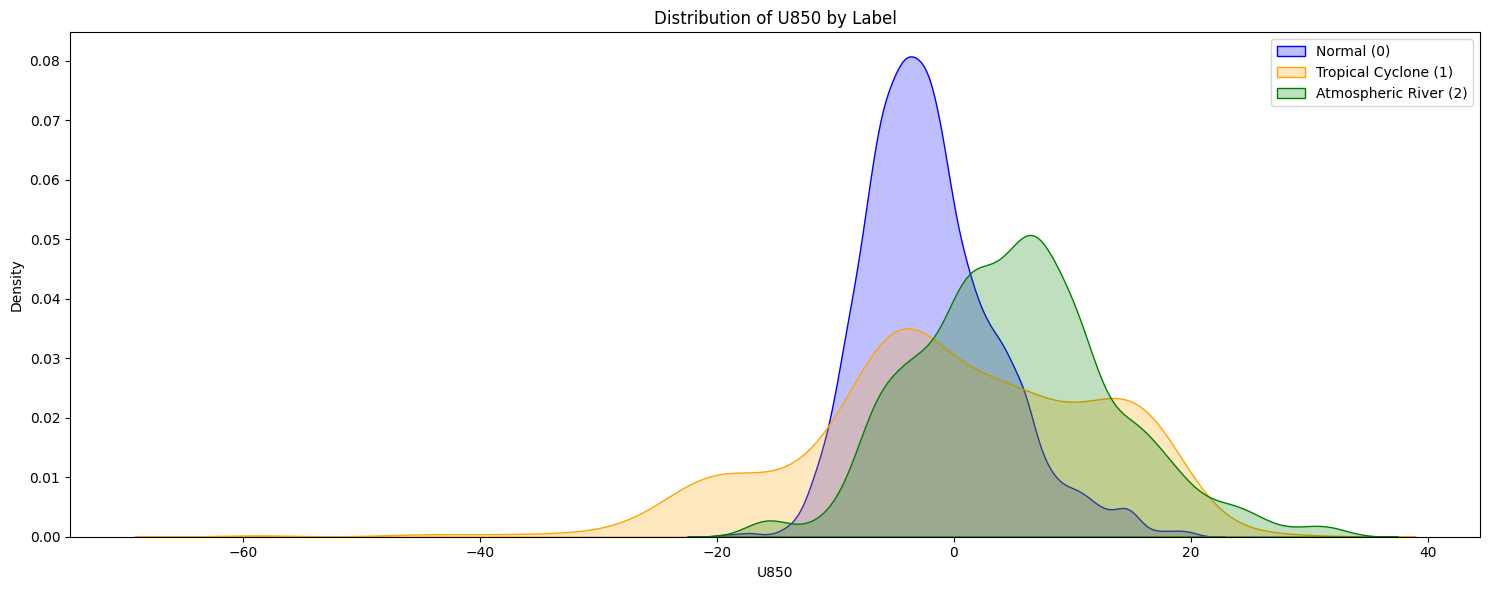

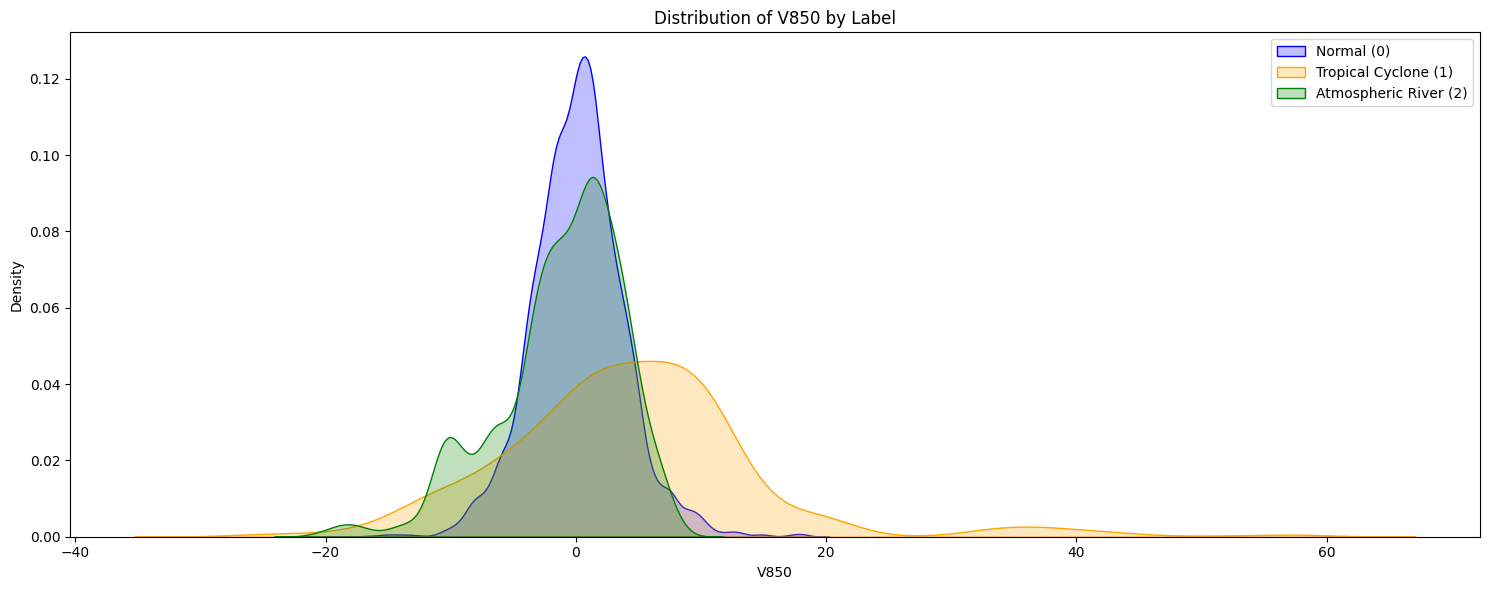

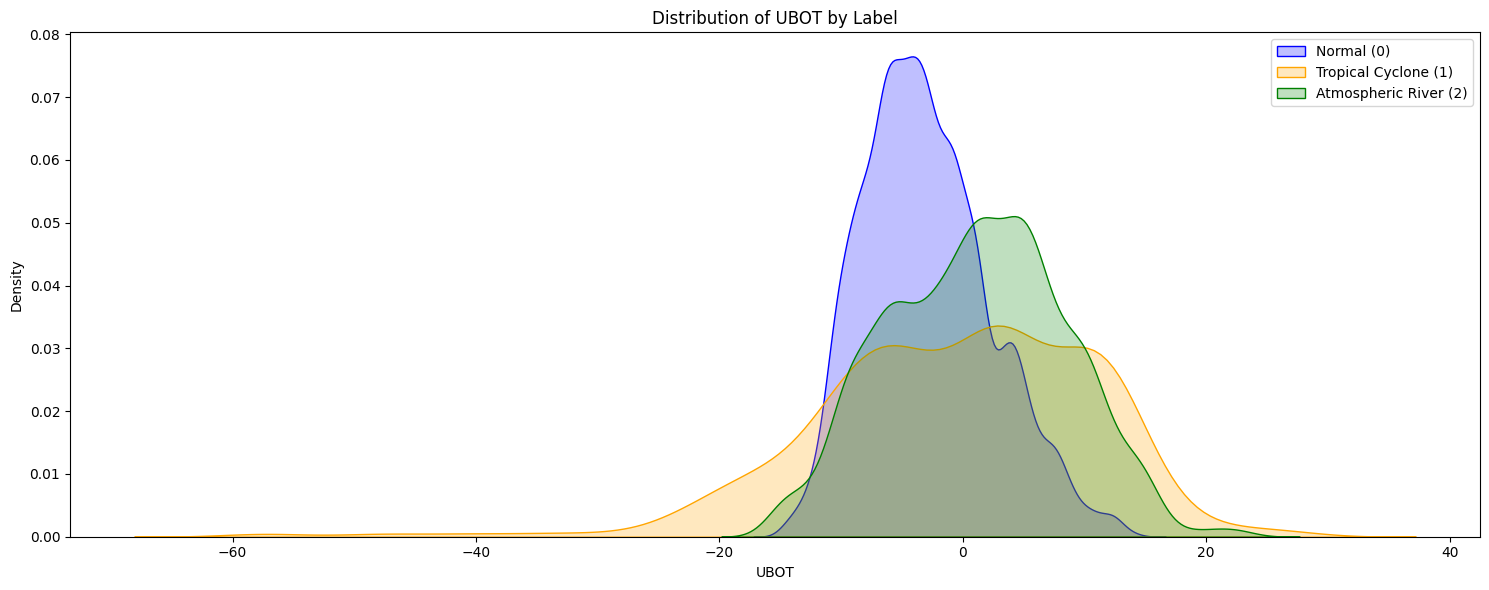

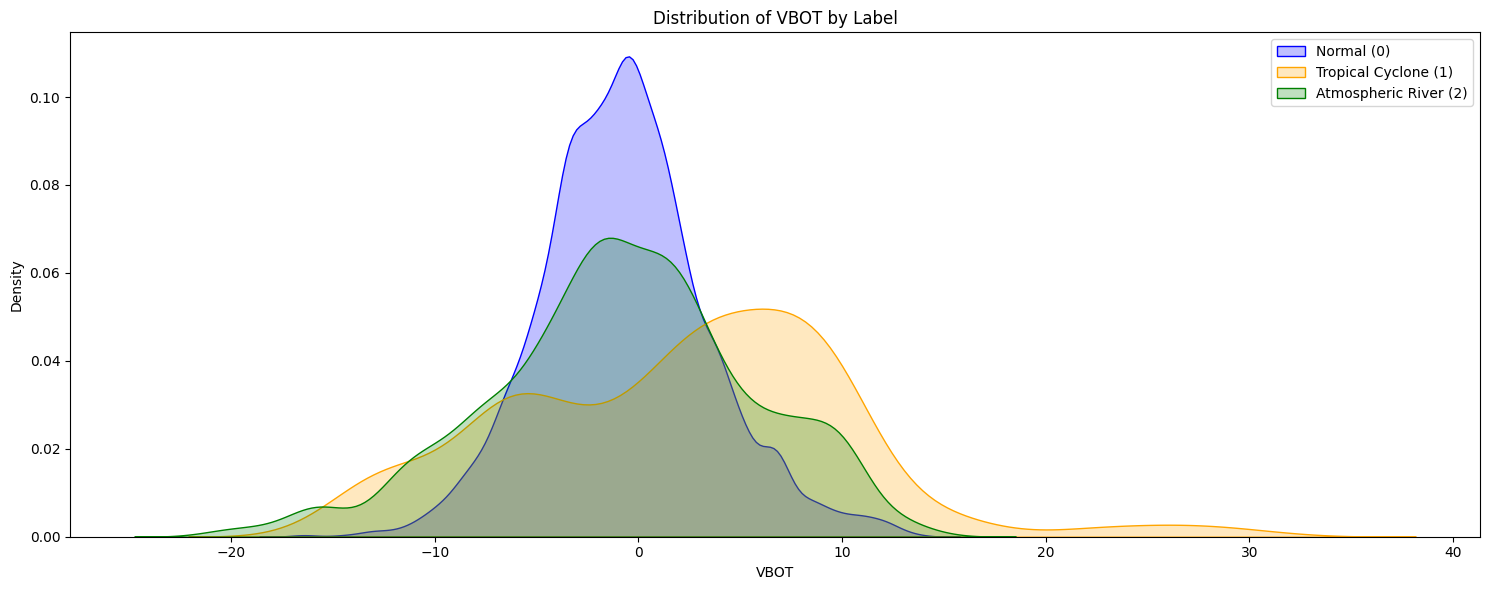

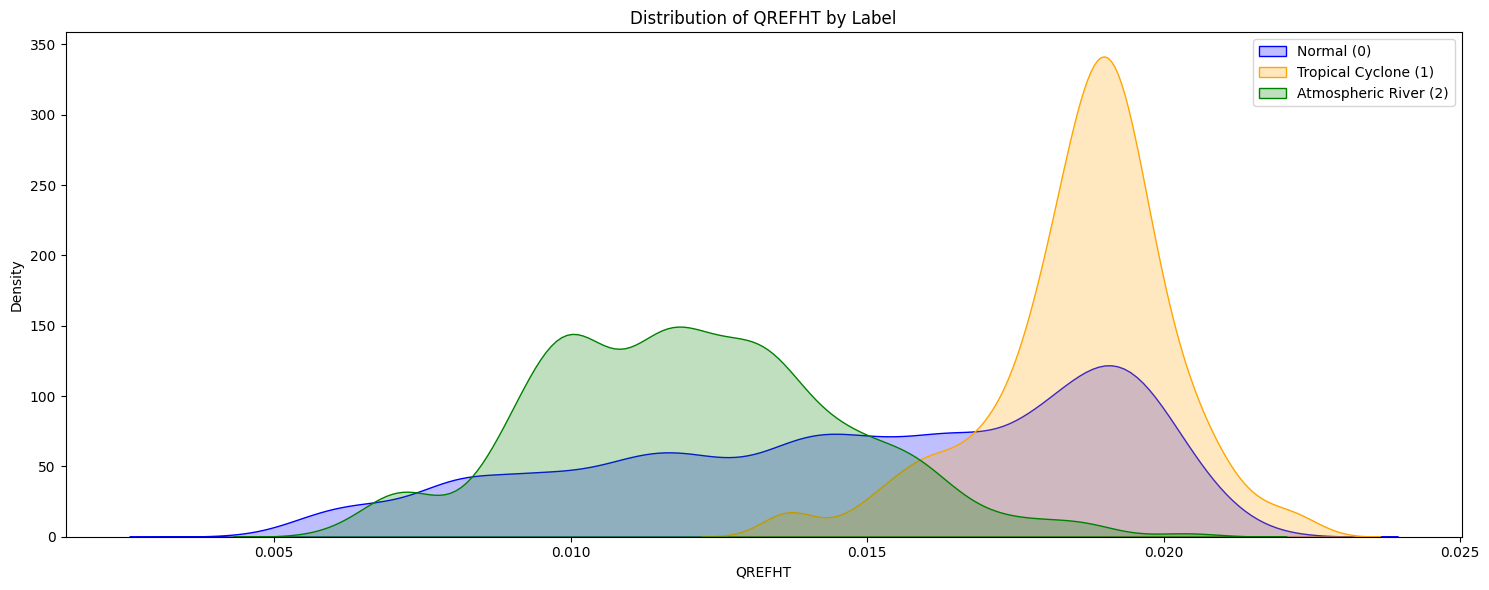

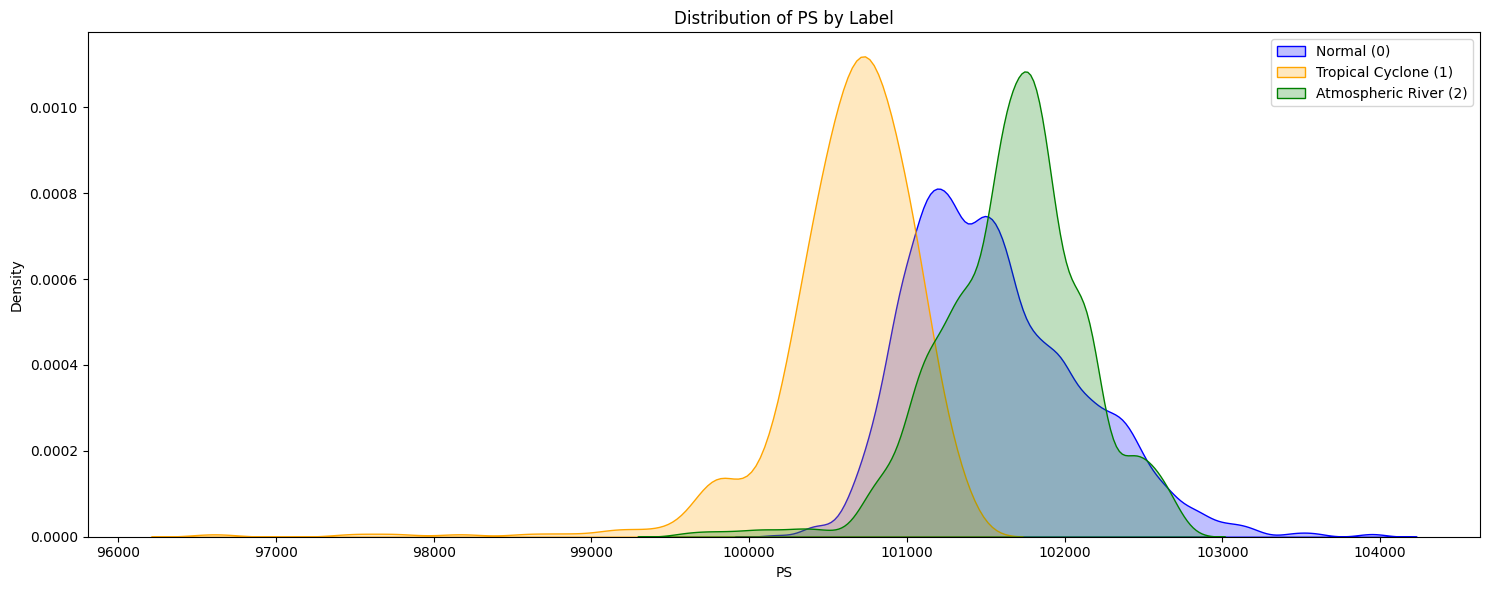

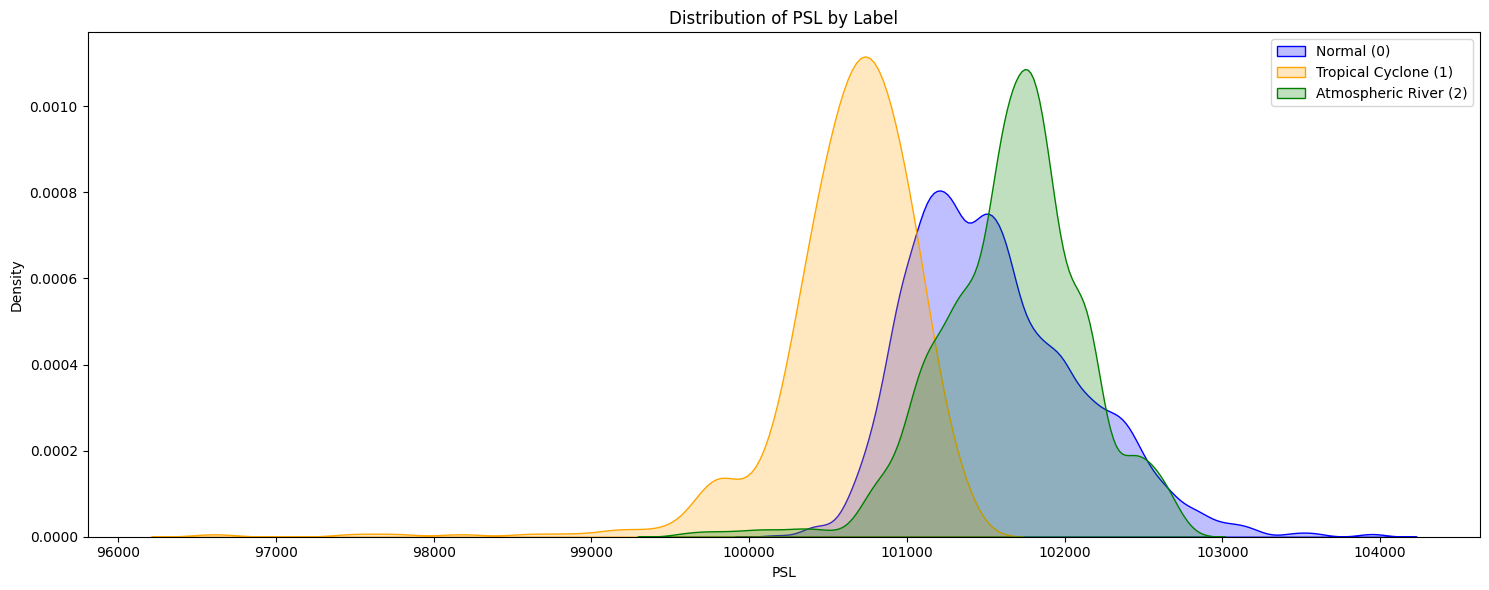

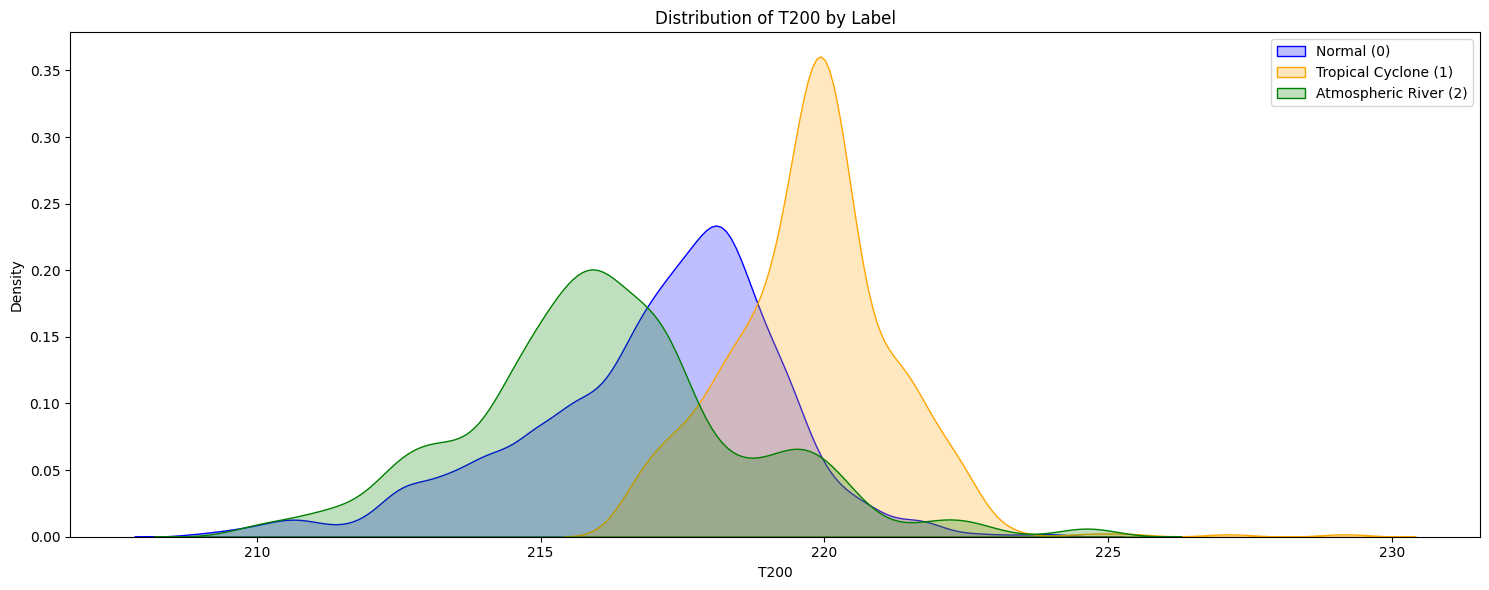

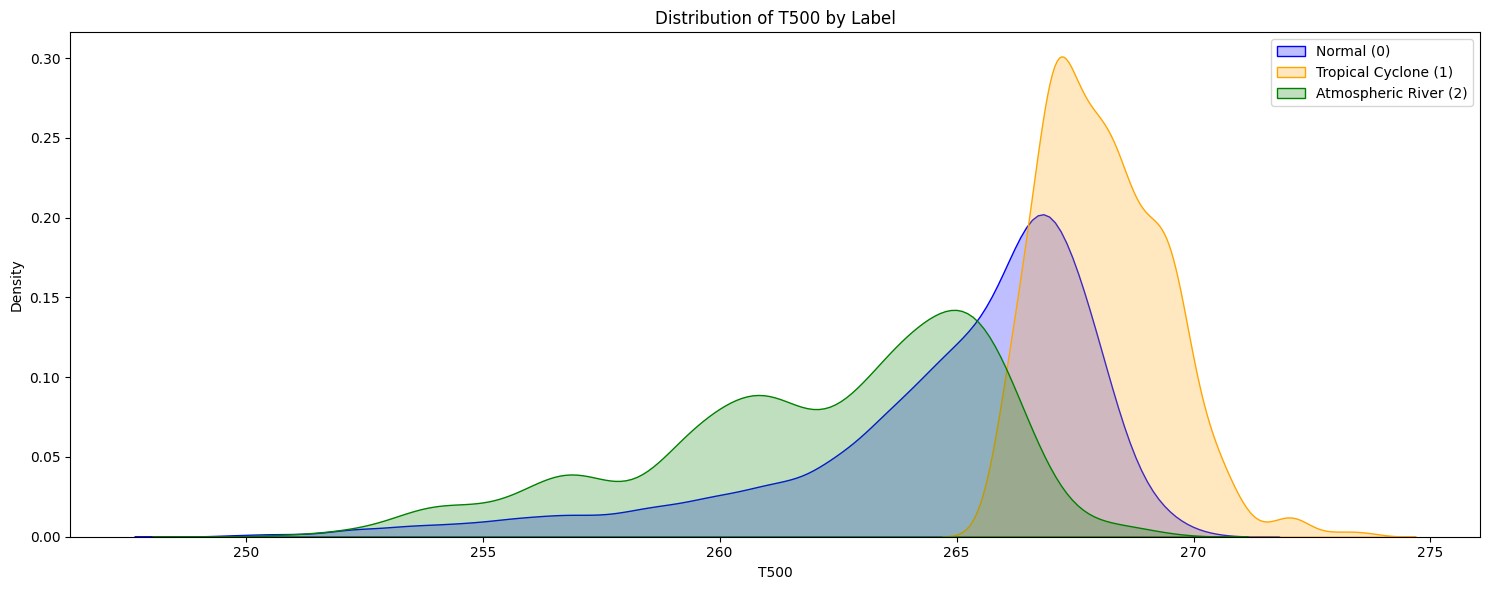

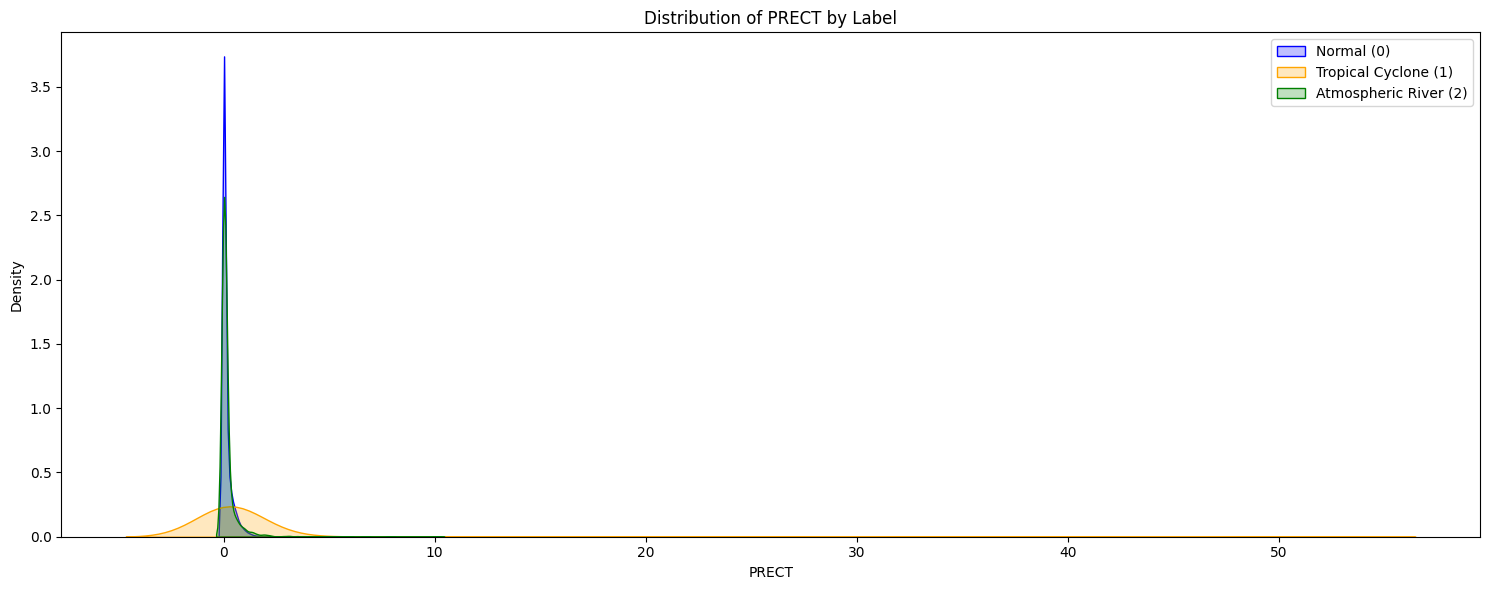

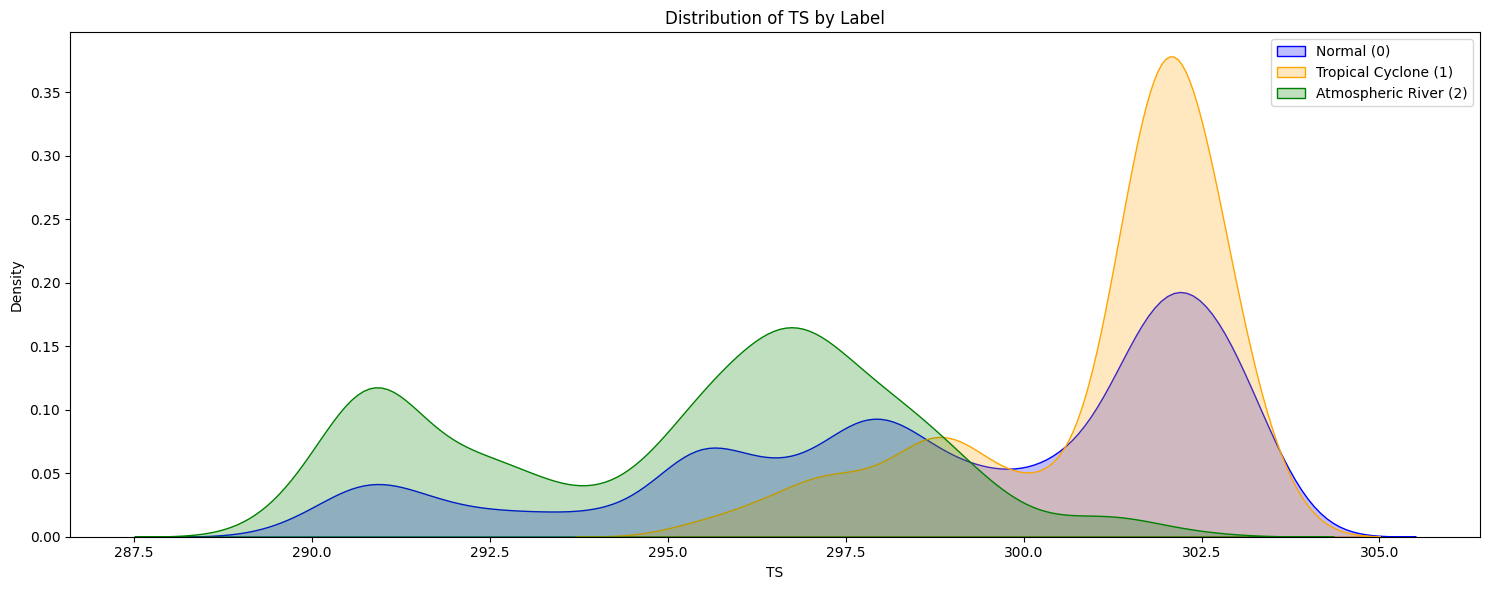

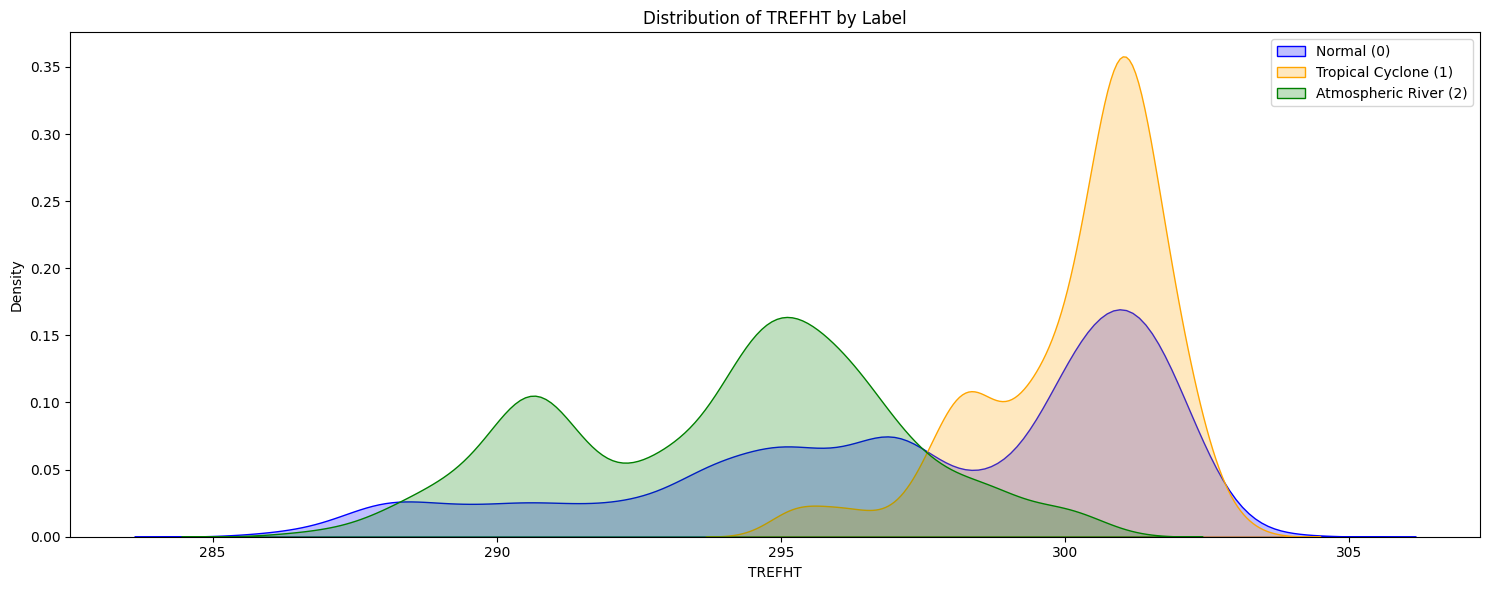

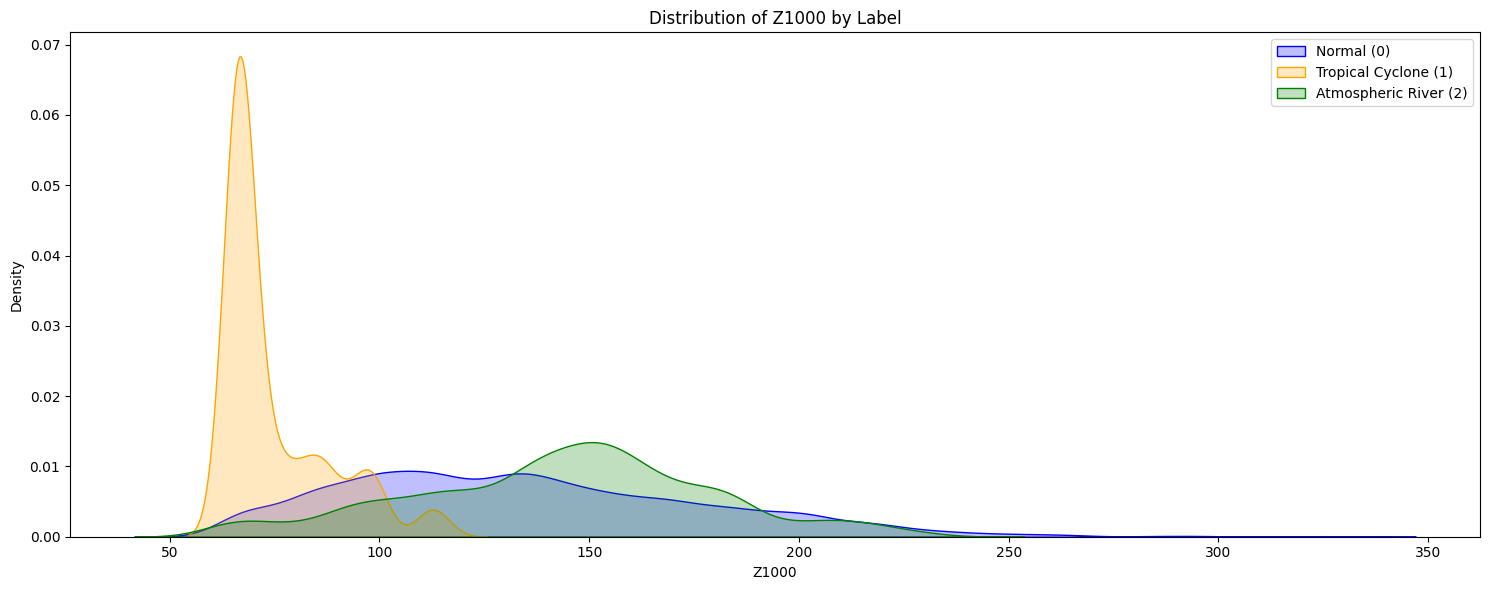

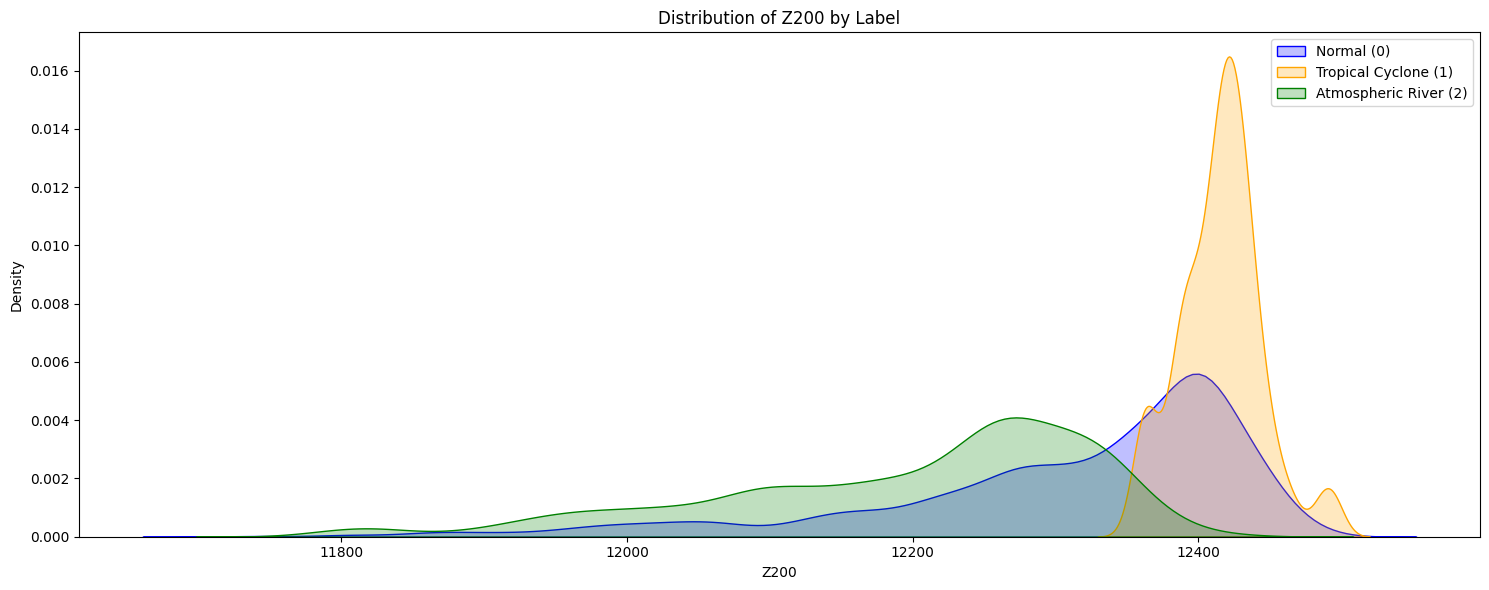

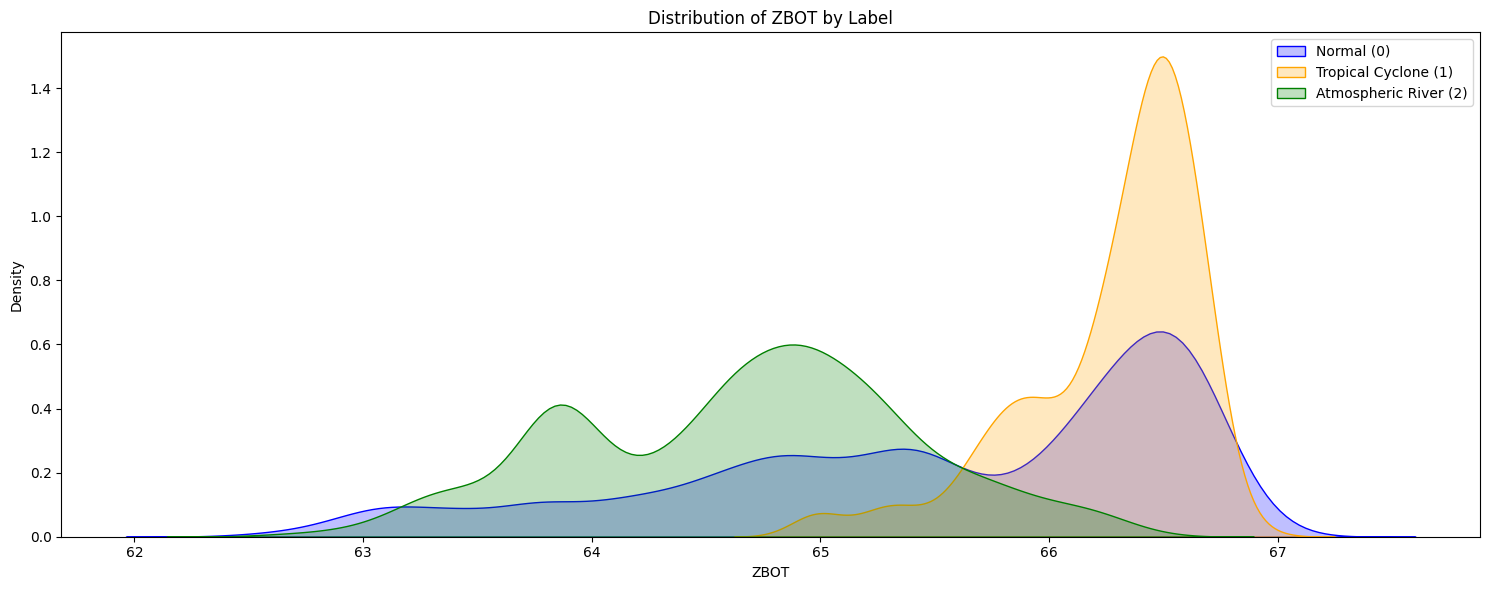

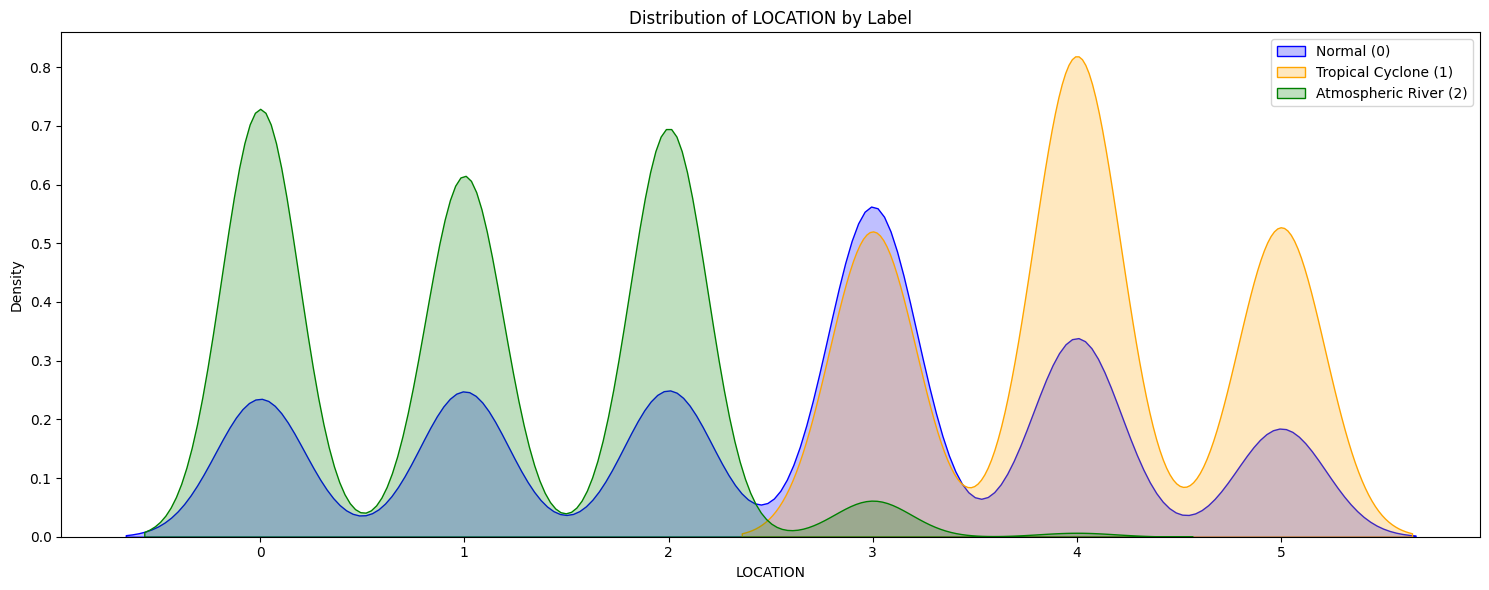

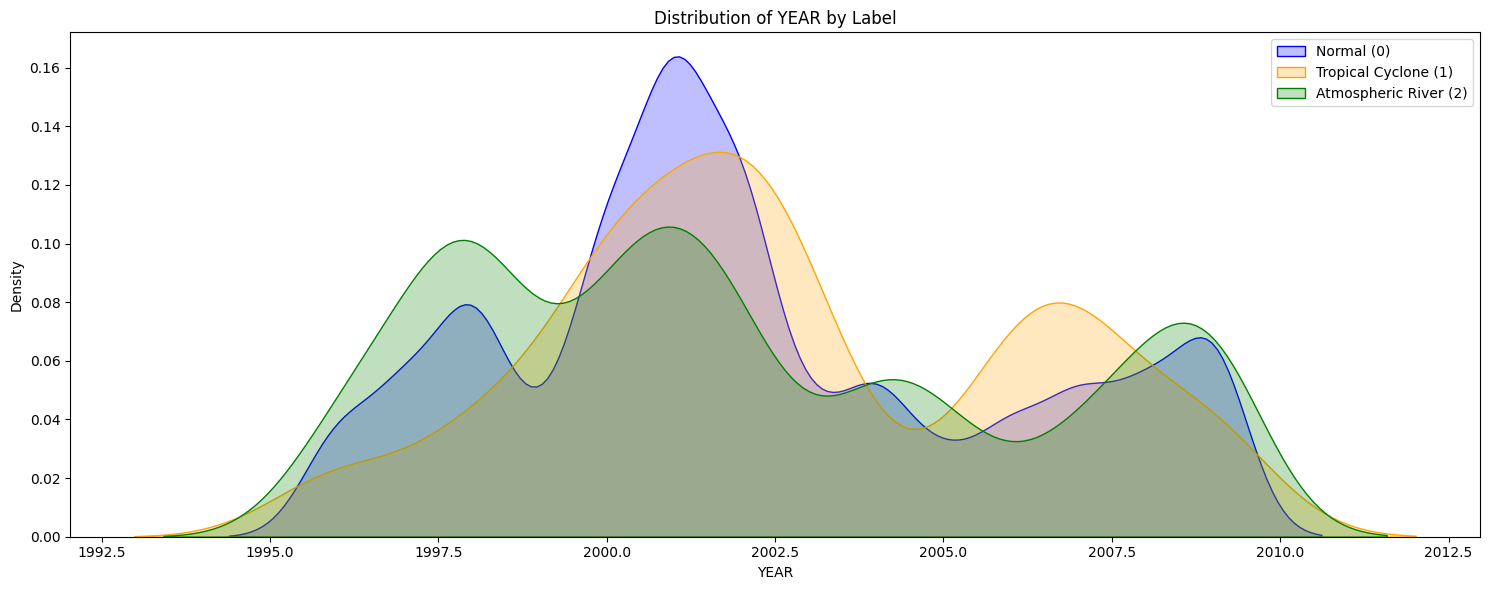

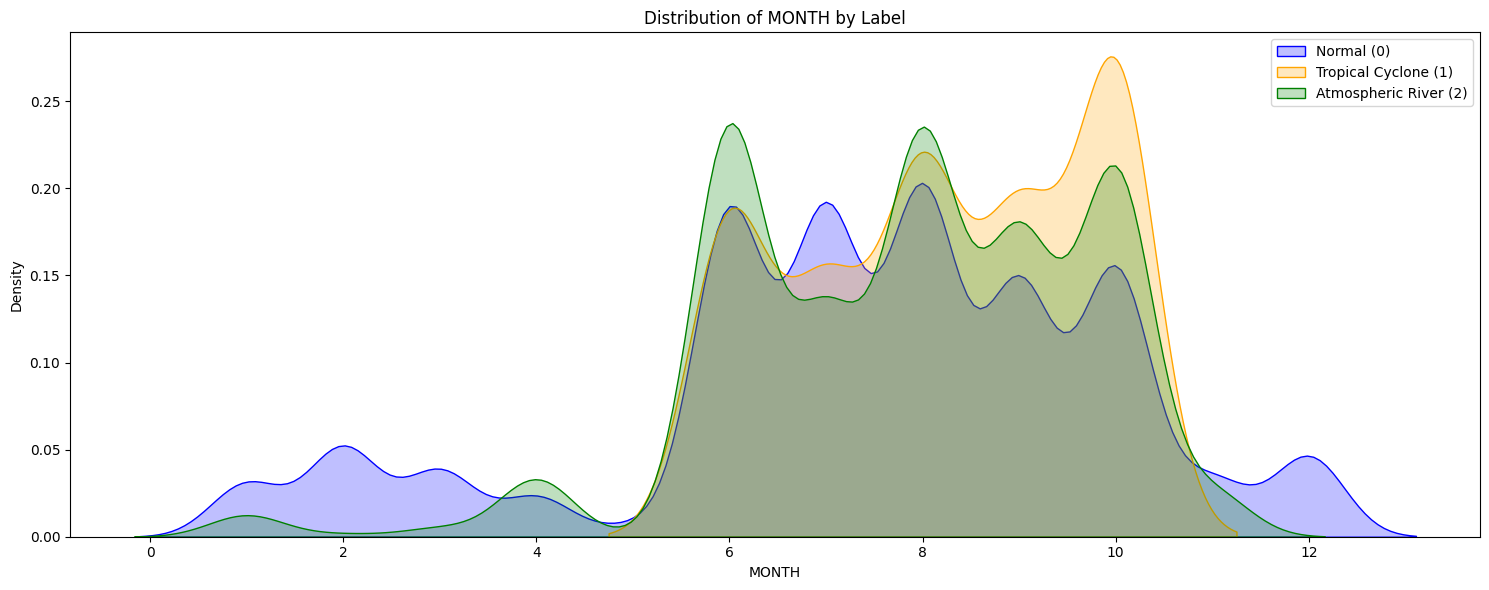

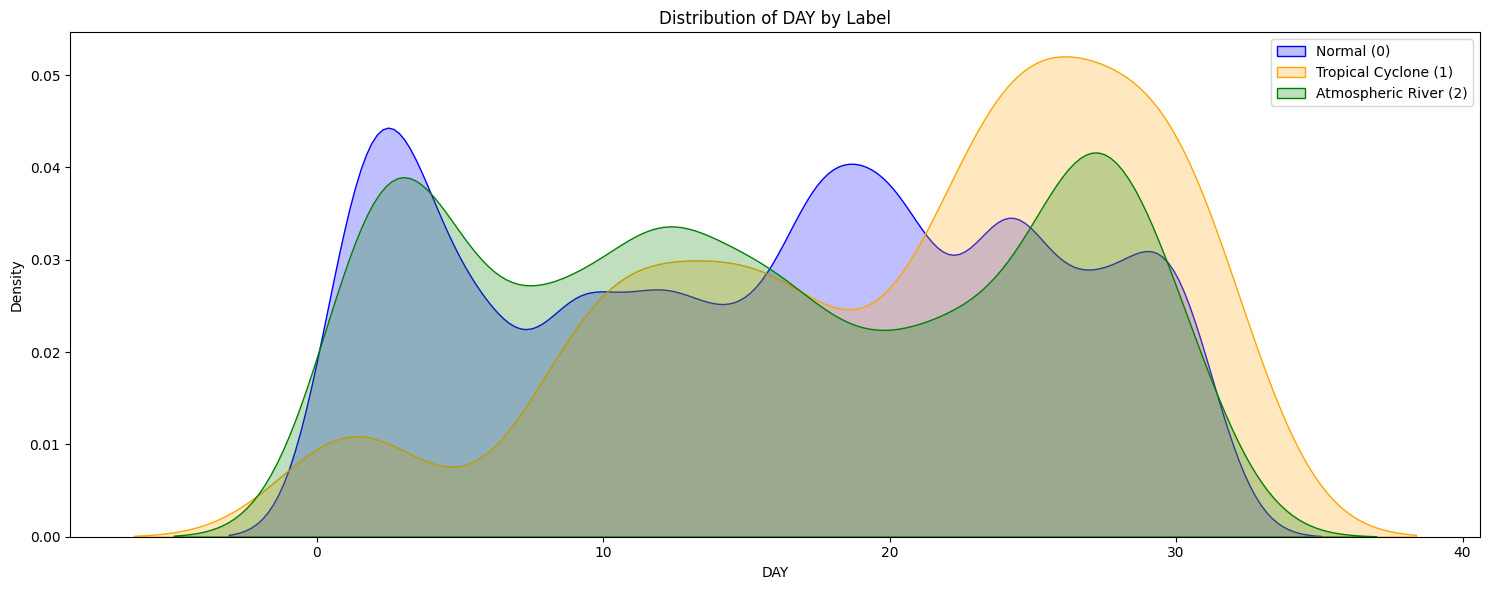

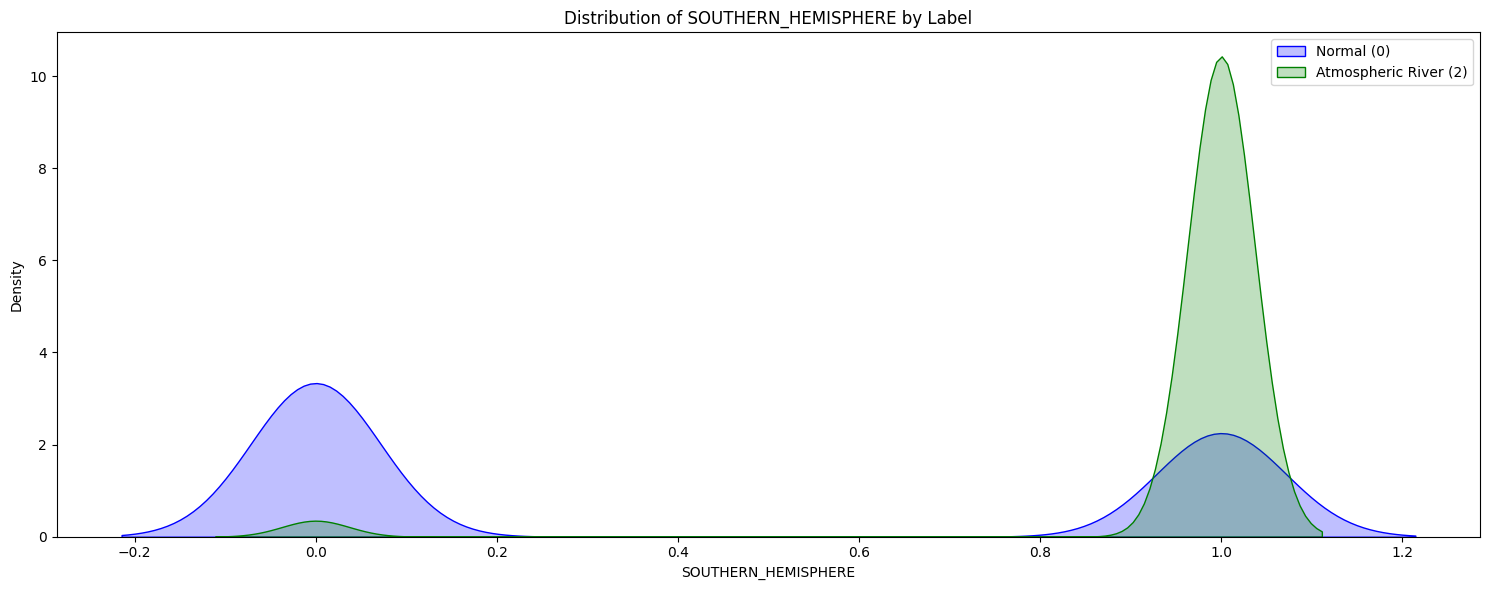

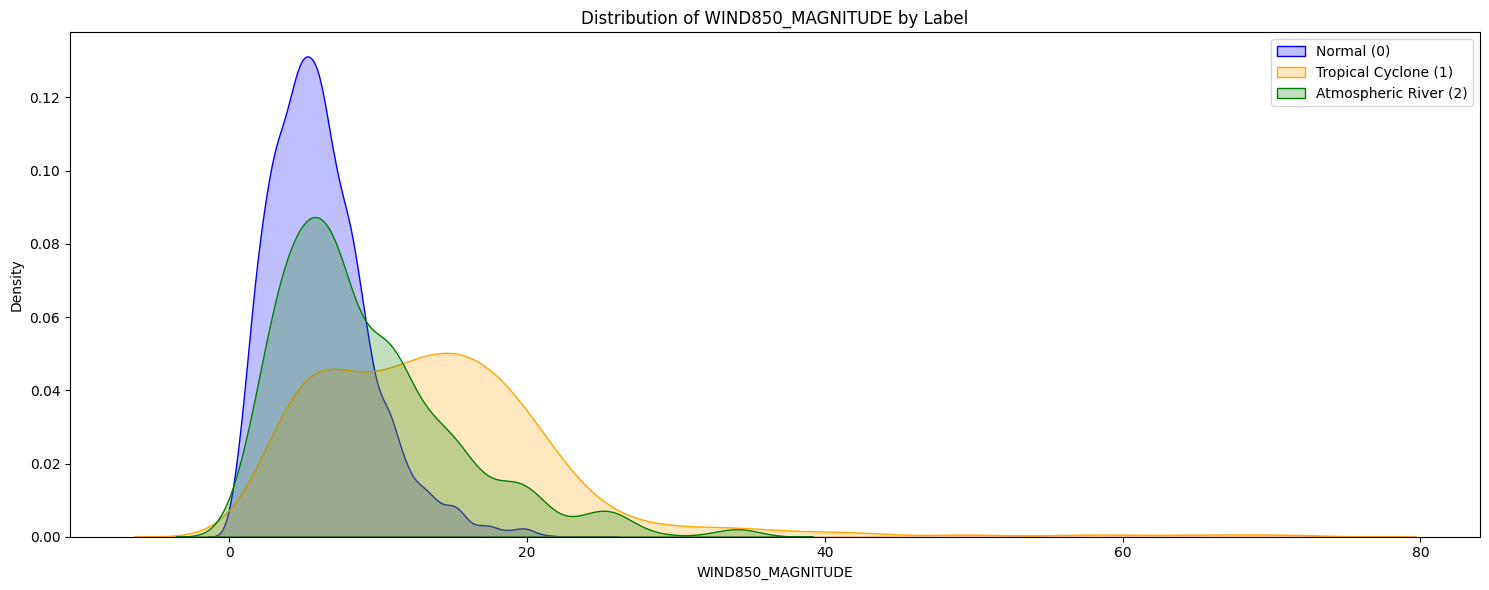

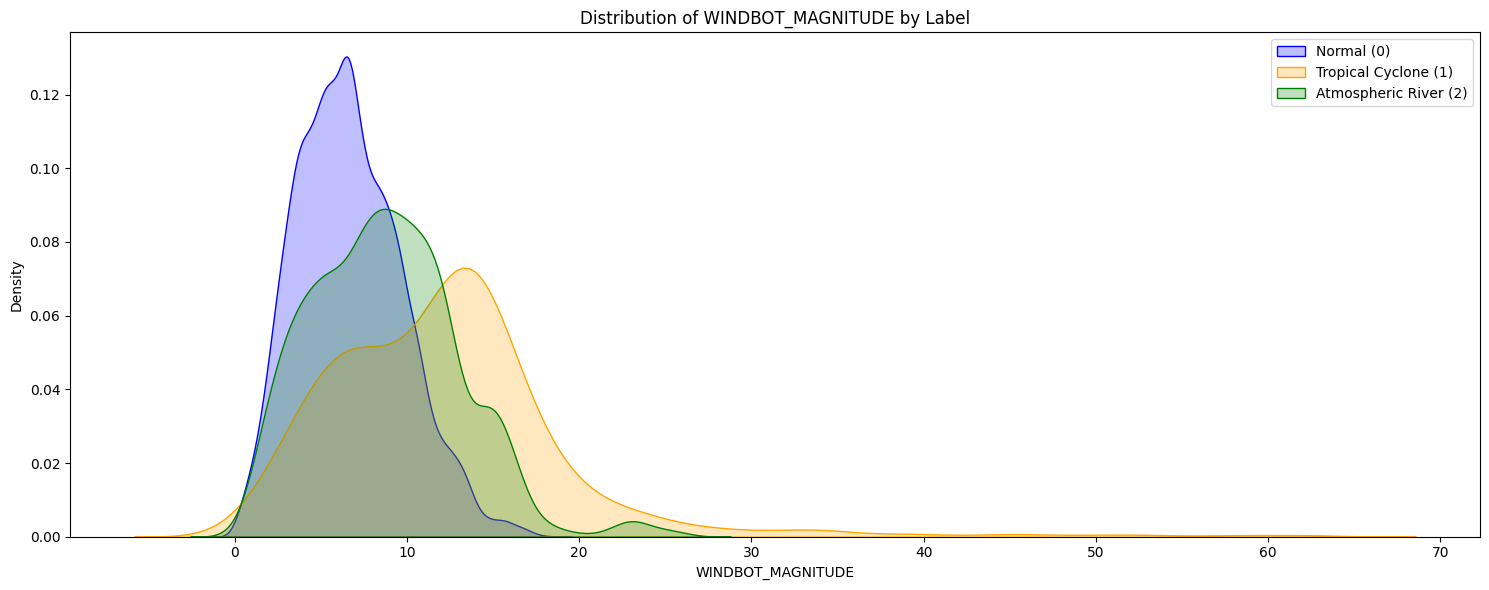

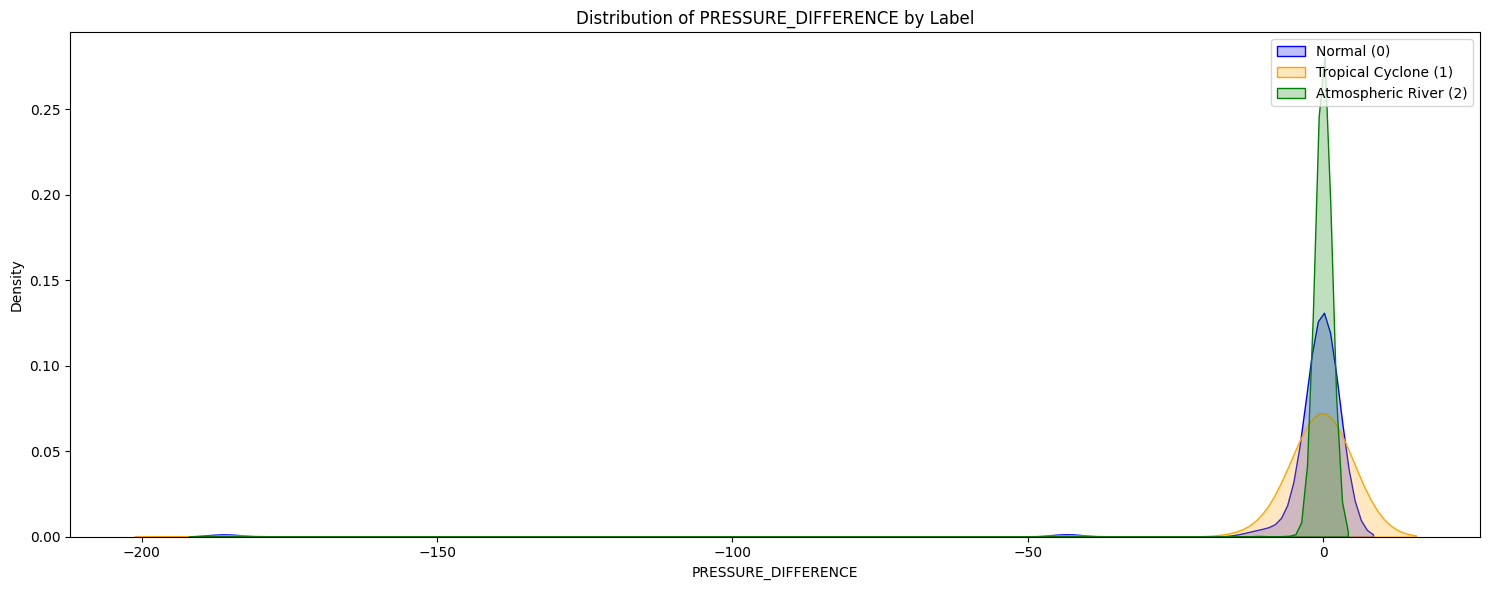

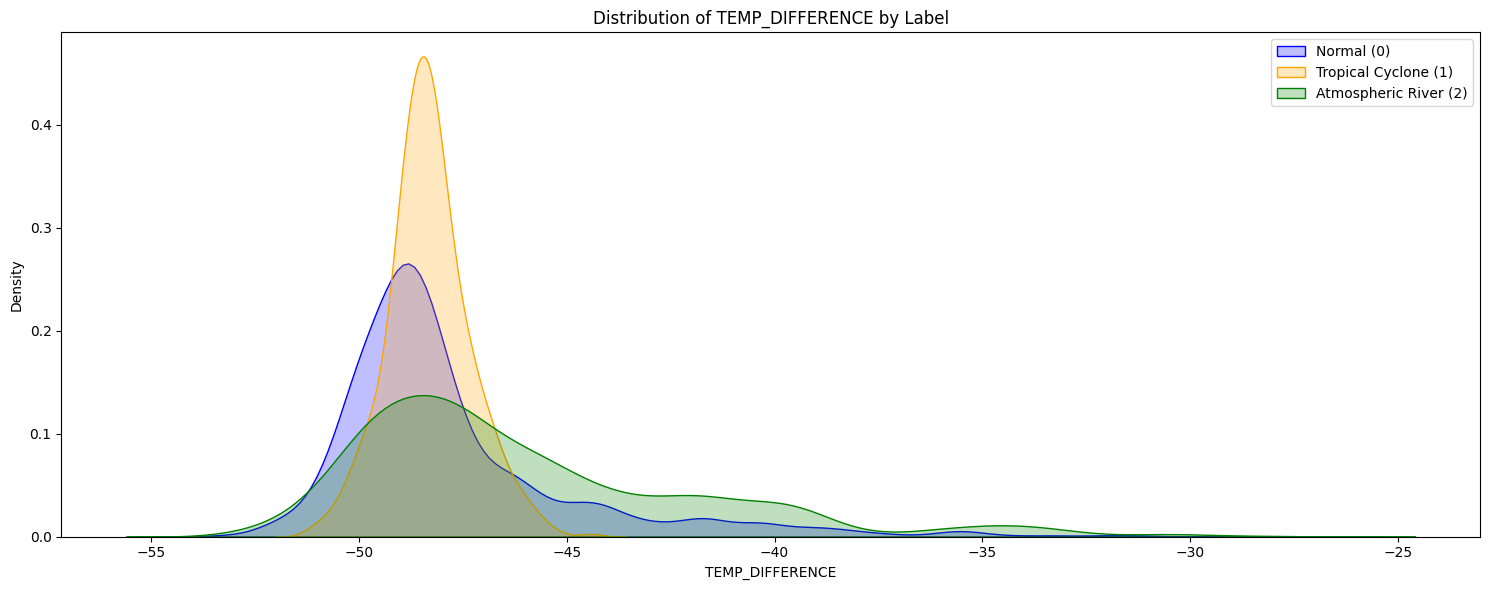

<Figure size 1500x600 with 0 Axes>

In [25]:
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Define colors and labels
colors = {
    0: 'blue',
    1: 'orange',
    2: 'green'
}

labels = {
    0: "Normal (0)",
    1: "Tropical Cyclone (1)",
    2: "Atmospheric River (2)"
}

# Create a plot for each variable with distinct colors
for var in list(data.columns):
    plt.figure(figsize=(15, 6))

    if var == "Label":
        continue
    
    # Plot KDE for each label with specified colors
    for label_num, color in colors.items():
        subset = data[data['Label'] == label_num]
        sns.kdeplot(subset[var], label=labels[label_num], shade=True, color=color)
    
    plt.title(f"Distribution of {var} by Label")
    plt.legend()
    plt.tight_layout()
    plt.show()
